<a href="https://colab.research.google.com/github/ArielSar-code/Ariel/blob/main/Python%20tesla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
L=[1,3,2]

In [3]:
import yfinance as yf

# Definir el ticker de Tesla
tesla = yf.Ticker("TSLA")

# Descargar los datos históricos (últimos 5 años por defecto)
historial = tesla.history(period="5y")

# Mostrar las primeras 5 filas
print(historial.head())


                                Open        High        Low       Close  \
Date                                                                      
2020-08-06 00:00:00-04:00  99.388664  101.153999  98.484001   99.305336   
2020-08-07 00:00:00-04:00  99.969330   99.983330  94.334000   96.847336   
2020-08-10 00:00:00-04:00  96.533333   97.166664  92.389336   94.571335   
2020-08-11 00:00:00-04:00  93.066666   94.666664  91.000000   91.625999   
2020-08-12 00:00:00-04:00  98.000000  105.666664  95.666664  103.650665   

                              Volume  Dividends  Stock Splits  
Date                                                           
2020-08-06 00:00:00-04:00   89884500        0.0           0.0  
2020-08-07 00:00:00-04:00  133446000        0.0           0.0  
2020-08-10 00:00:00-04:00  112834500        0.0           0.0  
2020-08-11 00:00:00-04:00  129387000        0.0           0.0  
2020-08-12 00:00:00-04:00  327441000        0.0           0.0  


In [4]:
pip install requests beautifulsoup4 pandas

In [15]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL de la página de estados financieros de Tesla en Yahoo Finance (Income Statement)
url = "https://finance.yahoo.com/quote/TSLA/financials/"

# Obtener la página
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

# Yahoo Finance usa scripts para cargar la tabla, por lo que no se puede obtener directamente con BeautifulSoup.
# Pero podemos usar la API JSON dentro del HTML para extraer los datos.

# Extraemos el script que contiene la data financiera
import re
import json

scripts = soup.find_all('script')

json_data = None
for script in scripts:
    if 'root.App.main' in script.text:
        # Extraemos JSON
        text = script.text
        json_str = re.search(r'root\.App\.main\s*=\s*({.*});', text).group(1)
        data = json.loads(json_str)
        json_data = data
        break

# Ahora, navegar por el JSON para encontrar los datos financieros
try:
    financial_data = json_data['context']['dispatcher']['stores']['QuoteSummaryStore']['incomeStatementHistory']['incomeStatementHistory']

    # Procesamos cada periodo
    rows = []
    for period in financial_data:
        date = period['endDate']['fmt']
        total_revenue = period.get('totalRevenue', {}).get('raw', None)
        net_income = period.get('netIncome', {}).get('raw', None)
        rows.append({'Date': date, 'Total Revenue': total_revenue, 'Net Income': net_income})

    df = pd.DataFrame(rows)
    print(df)
except Exception as e:
    print("Error extrayendo datos:", e)


Error extrayendo datos: 'NoneType' object is not subscriptable


In [16]:
import requests
from bs4 import BeautifulSoup
import re
import json
import pandas as pd

# URL de la página financiera de Tesla en Yahoo Finance (Income Statement)
url = "https://finance.yahoo.com/quote/TSLA/financials/"

# Obtener la página
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

# Buscar el script que contiene la data JSON
scripts = soup.find_all('script')
json_data = None
for script in scripts:
    if 'root.App.main' in script.text:
        text = script.text
        json_str = re.search(r'root\.App\.main\s*=\s*({.*});', text).group(1)
        json_data = json.loads(json_str)
        break

# Extraer datos de ingresos (incomeStatementHistory)
income_statements = json_data['context']['dispatcher']['stores']['QuoteSummaryStore']['incomeStatementHistory']['incomeStatementHistory']

# Crear lista para guardar la info
tesla_revenue_list = []
for statement in income_statements:
    date = statement['endDate']['fmt']
    revenue = statement.get('totalRevenue', {}).get('raw', None)
    tesla_revenue_list.append({'Date': date, 'Revenue': revenue})

# Crear DataFrame
tesla_revenue = pd.DataFrame(tesla_revenue_list)

# Mostrar las últimas 5 filas
print(tesla_revenue.tail(5))



TypeError: 'NoneType' object is not subscriptable

In [17]:
import yfinance as yf

tesla = yf.Ticker("TSLA")

# Obtener estados de ingresos (income statement)
income_stmt = tesla.financials

# Mostrar las últimas 5 filas
print(income_stmt.tail(5))


                                      2024-12-31    2023-12-31    2022-12-31  \
Selling General And Administration  5.150000e+09  4.800000e+09  3.946000e+09   
Gross Profit                        1.745000e+10  1.766000e+10  2.085300e+10   
Cost Of Revenue                     8.024000e+10  7.911300e+10  6.060900e+10   
Total Revenue                       9.769000e+10  9.677300e+10  8.146200e+10   
Operating Revenue                   9.769000e+10  9.677300e+10  8.146200e+10   

                                      2021-12-31  2020-12-31  
Selling General And Administration  4.517000e+09         NaN  
Gross Profit                        1.360600e+10         NaN  
Cost Of Revenue                     4.021700e+10         NaN  
Total Revenue                       5.382300e+10         NaN  
Operating Revenue                   5.382300e+10         NaN  


In [18]:
import yfinance as yf
import pandas as pd

# Crear objeto Tesla
tesla = yf.Ticker("TSLA")

# Obtener el estado de resultados (financials) en formato DataFrame
income_stmt = tesla.financials

# income_stmt tiene columnas con fechas y filas con conceptos (revenue, gross profit, etc)
# Queremos la fila "Total Revenue"

# Transponer para que fechas sean filas
income_stmt_T = income_stmt.T

# Seleccionar solo la columna "Total Revenue"
tesla_revenue = income_stmt_T[["Total Revenue"]]

# Mostrar las últimas 5 filas
print(tesla_revenue.tail(5))


            Total Revenue
2024-12-31   9.769000e+10
2023-12-31   9.677300e+10
2022-12-31   8.146200e+10
2021-12-31   5.382300e+10
2020-12-31            NaN


In [19]:
print(tesla_revenue.tail(5))

            Total Revenue
2024-12-31   9.769000e+10
2023-12-31   9.677300e+10
2022-12-31   8.146200e+10
2021-12-31   5.382300e+10
2020-12-31            NaN


In [20]:
import yfinance as yf

# Descargar datos históricos de GME (GameStop)
gme = yf.Ticker("GME")
gme_data = gme.history(period="1mo")  # último mes, por ejemplo

# Resetear el índice (para que la fecha sea columna y no índice)
gme_data = gme_data.reset_index()

# Guardar el DataFrame a un archivo CSV (opcional)
gme_data.to_csv("gme_data.csv", index=False)

# Mostrar las primeras 5 filas
print(gme_data.head(5))


                       Date       Open       High        Low      Close  \
0 2025-07-07 00:00:00-04:00  23.480000  23.480000  22.530001  22.620001   
1 2025-07-08 00:00:00-04:00  22.709999  22.950001  22.580000  22.750000   
2 2025-07-09 00:00:00-04:00  22.879999  23.600000  22.530001  23.190001   
3 2025-07-10 00:00:00-04:00  23.040001  23.330000  23.010000  23.100000   
4 2025-07-11 00:00:00-04:00  23.129999  24.049999  23.129999  23.330000   

     Volume  Dividends  Stock Splits  
0  12873500        0.0           0.0  
1   7863600        0.0           0.0  
2  14641400        0.0           0.0  
3   5991000        0.0           0.0  
4  11454100        0.0           0.0  


In [21]:
import yfinance as yf
import pandas as pd

# Crear objeto para GME
gme = yf.Ticker("GME")

# Obtener estado de resultados (financials)
income_stmt = gme.financials

# Transponer para que las fechas sean filas
income_stmt_T = income_stmt.T

# Seleccionar solo la fila de ingresos totales (Total Revenue)
gme_revenue = income_stmt_T[["Total Revenue"]]

# Mostrar las últimas 5 filas
print(gme_revenue.tail(5))


            Total Revenue
2025-01-31   3.823000e+09
2024-01-31   5.272800e+09
2023-01-31   5.927200e+09
2022-01-31   6.010700e+09
2021-01-31            NaN


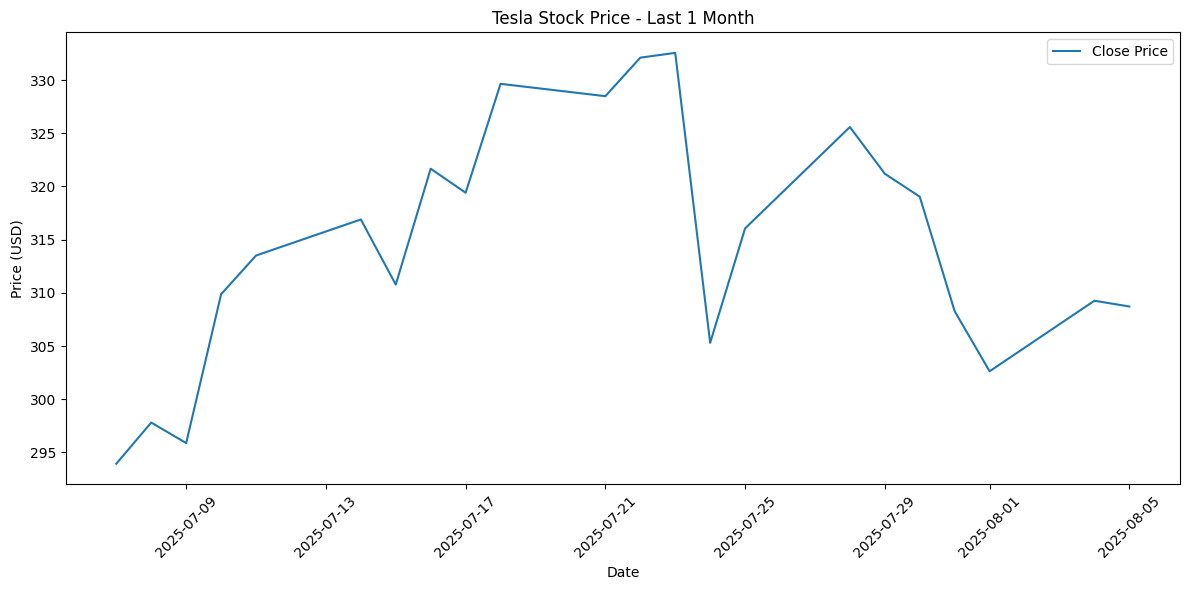

In [22]:
import yfinance as yf
import matplotlib.pyplot as plt

# Definir la función para graficar
def make_graph(df, title):
    plt.figure(figsize=(12,6))
    plt.plot(df['Date'], df['Close'], label='Close Price')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Descargar datos históricos de Tesla
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="1mo").reset_index()

# Usar la función para graficar con título
make_graph(tesla_data, "Tesla Stock Price - Last 1 Month")


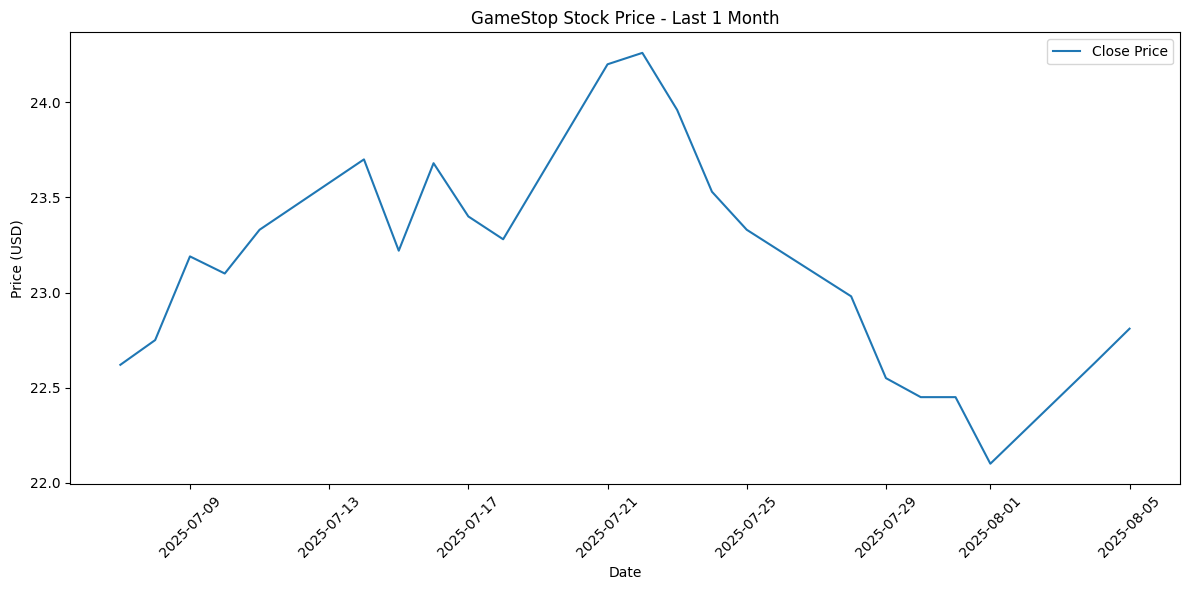

In [23]:
import yfinance as yf

# Supongamos que ya tienes definida esta función:
def make_graph(df, title):
    import matplotlib.pyplot as plt

    plt.figure(figsize=(12,6))
    plt.plot(df['Date'], df['Close'], label='Close Price')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Descargar datos históricos de GameStop
gme = yf.Ticker("GME")
gme_data = gme.history(period="1mo").reset_index()

# Graficar con título
make_graph(gme_data, "GameStop Stock Price - Last 1 Month")
